# Computer Network Traffic compramise detection

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [3]:
## Loading dataset

df = pd.read_csv("ipasn.csv")

In [4]:
print(df)
print (df.dtypes)

             date  l_ipn  r_asn  f
0      2006-07-01      0    701  1
1      2006-07-01      0    714  1
2      2006-07-01      0   1239  1
3      2006-07-01      0   1680  1
4      2006-07-01      0   2514  1
...           ...    ...    ... ..
20798  2006-09-30      8  36351  3
20799  2006-09-30      8  36856  4
20800  2006-09-30      9   2152  1
20801  2006-09-30      9   8070  1
20802  2006-09-30      9   8075  2

[20803 rows x 4 columns]
date     object
l_ipn     int64
r_asn     int64
f         int64
dtype: object


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd81ee36640>,
      dtype=object)

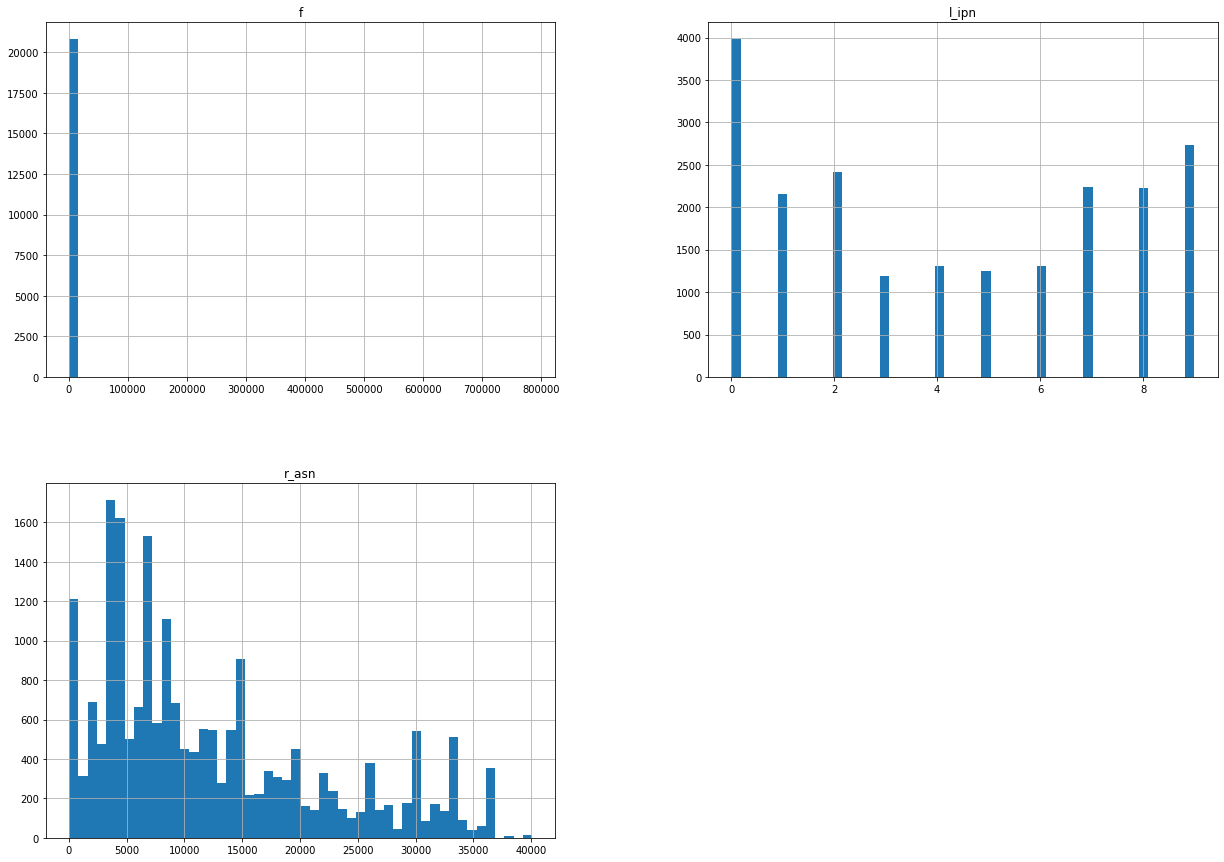

In [5]:
## histogram 
df.hist(bins=50, figsize=(21,15))

### We see here that "f" value ranges from 1 to 800000. 
Identifying outliers will be a good indicator for network compramise.

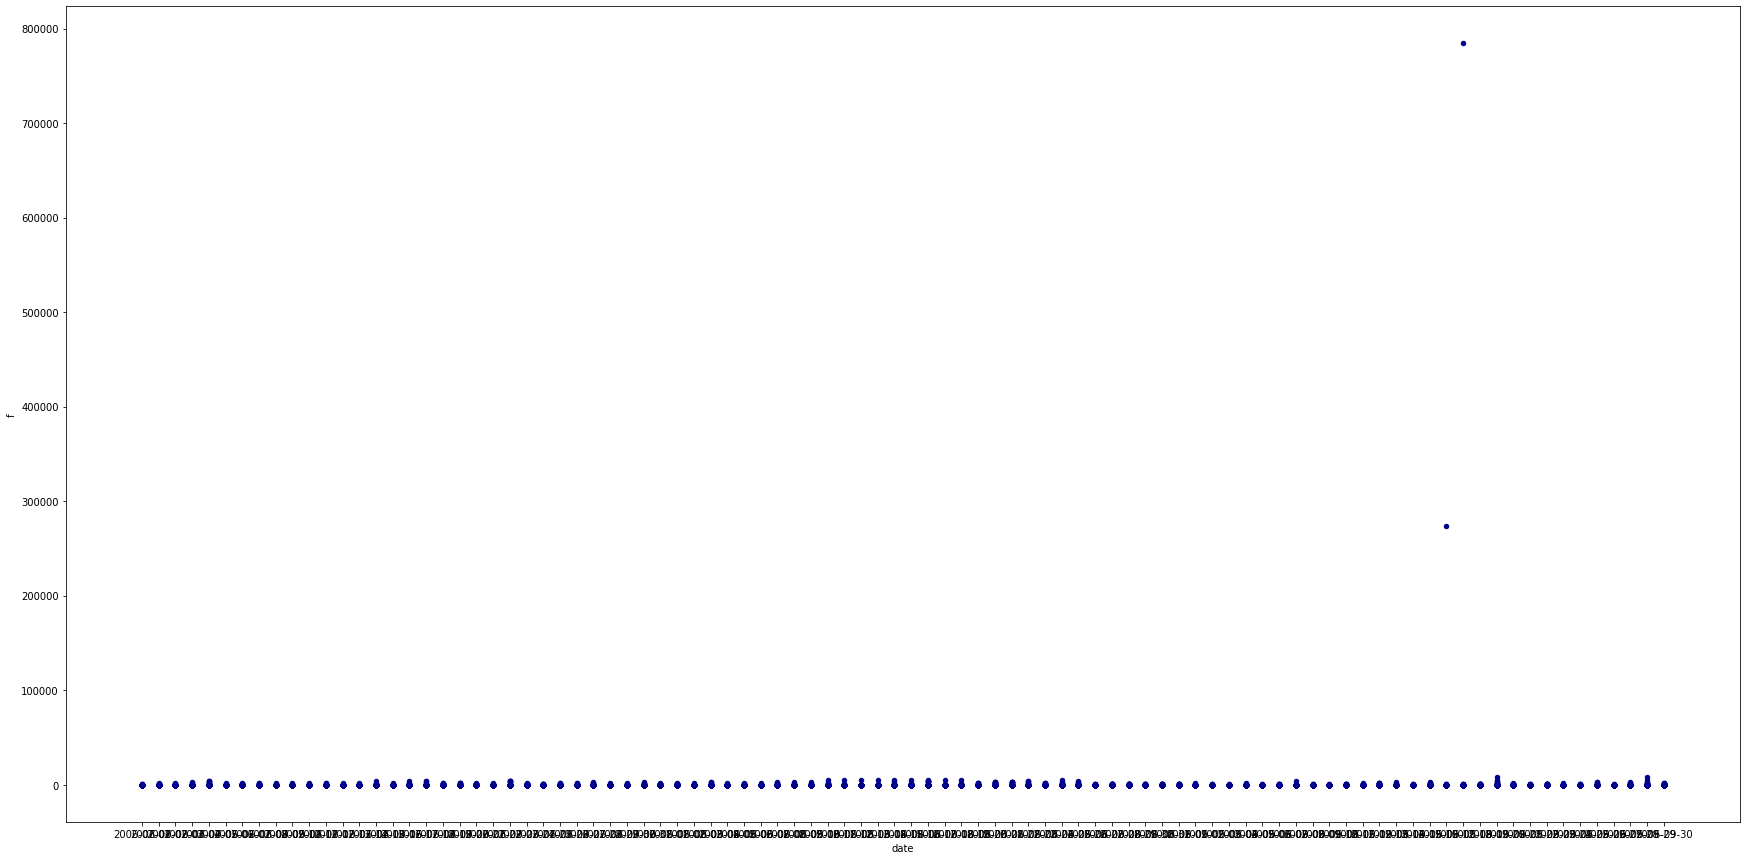

In [6]:
df.plot.scatter(x='date',y='f',c='DarkBlue', figsize=(30,15))


In [12]:
print("Mean of 'f' is ", df['f'].mean())

Mean of 'f' is  93.91424313800894


ipn:  0


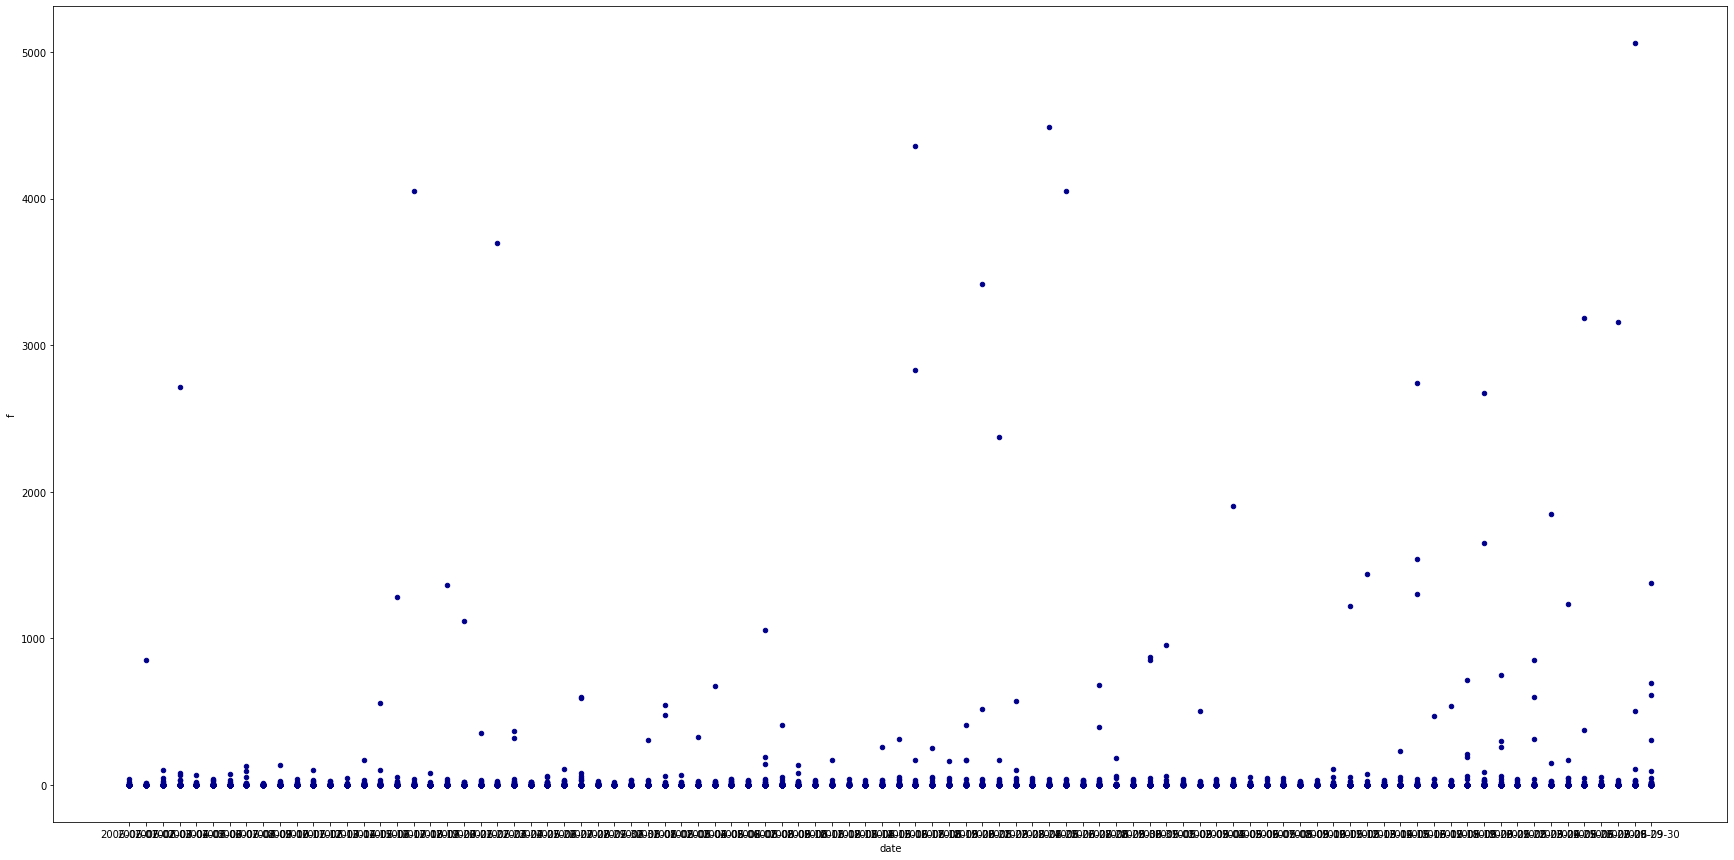

ipn:  1


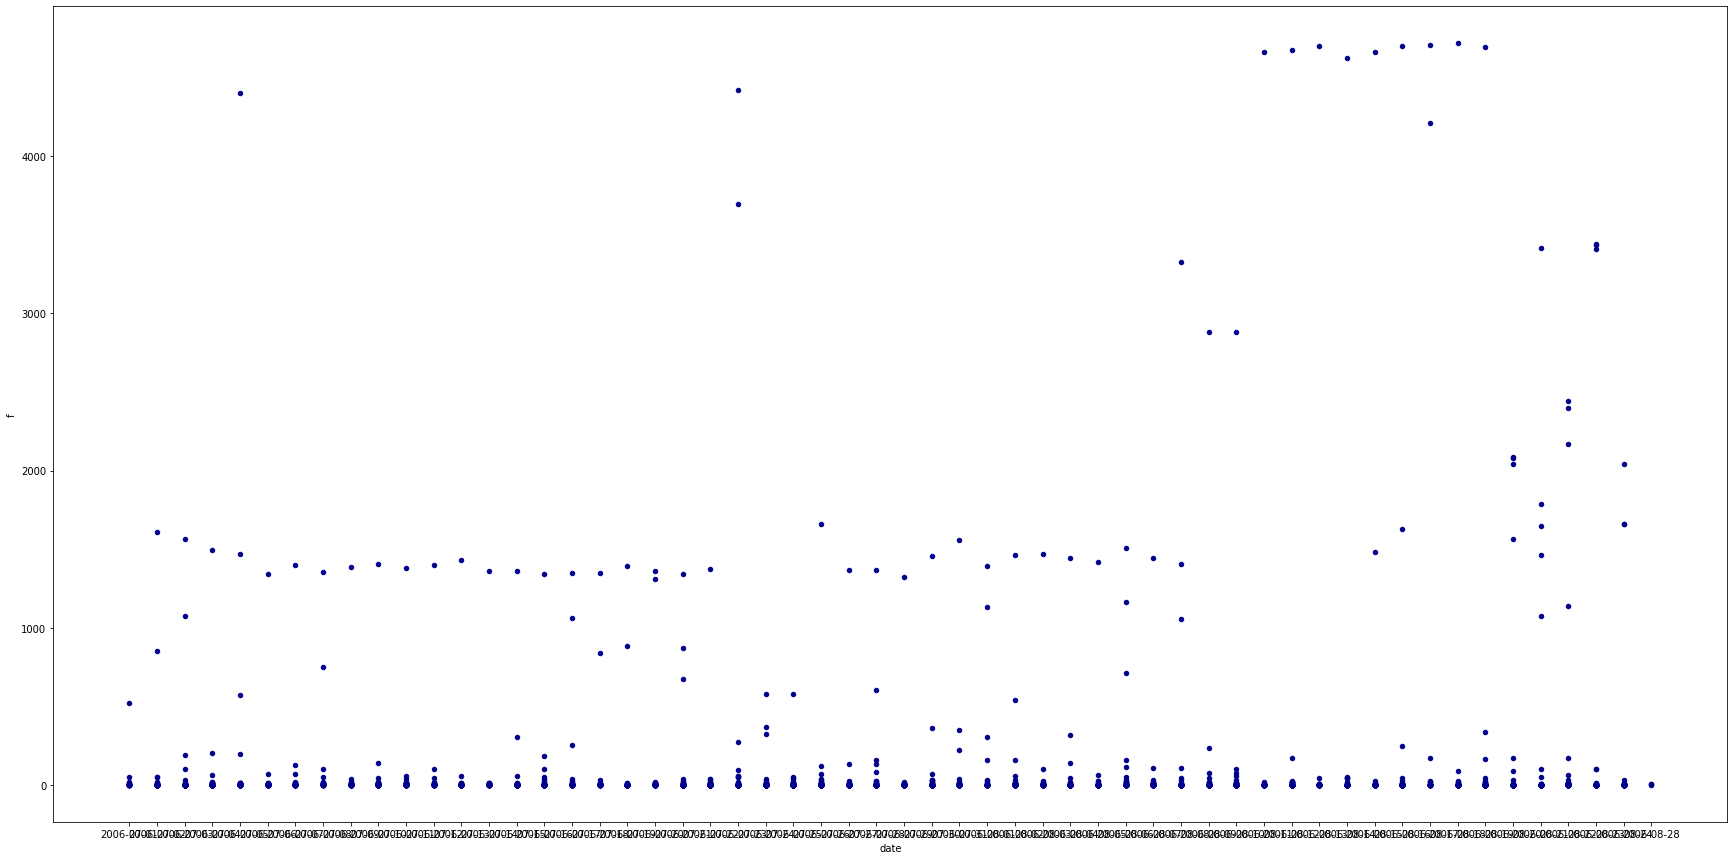

ipn:  2


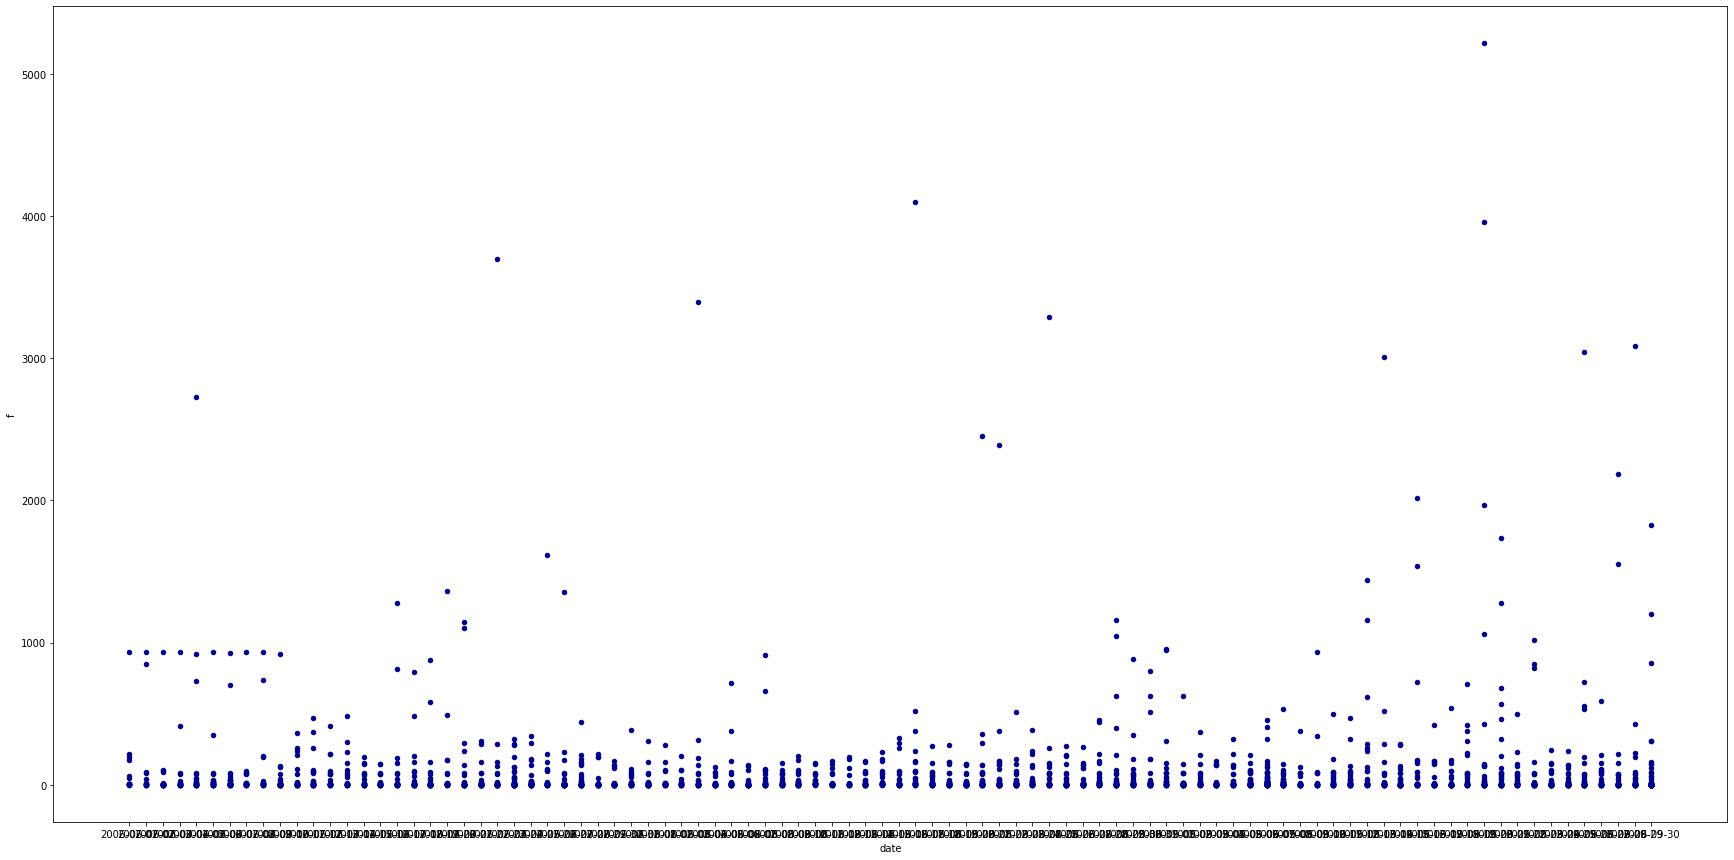

ipn:  3


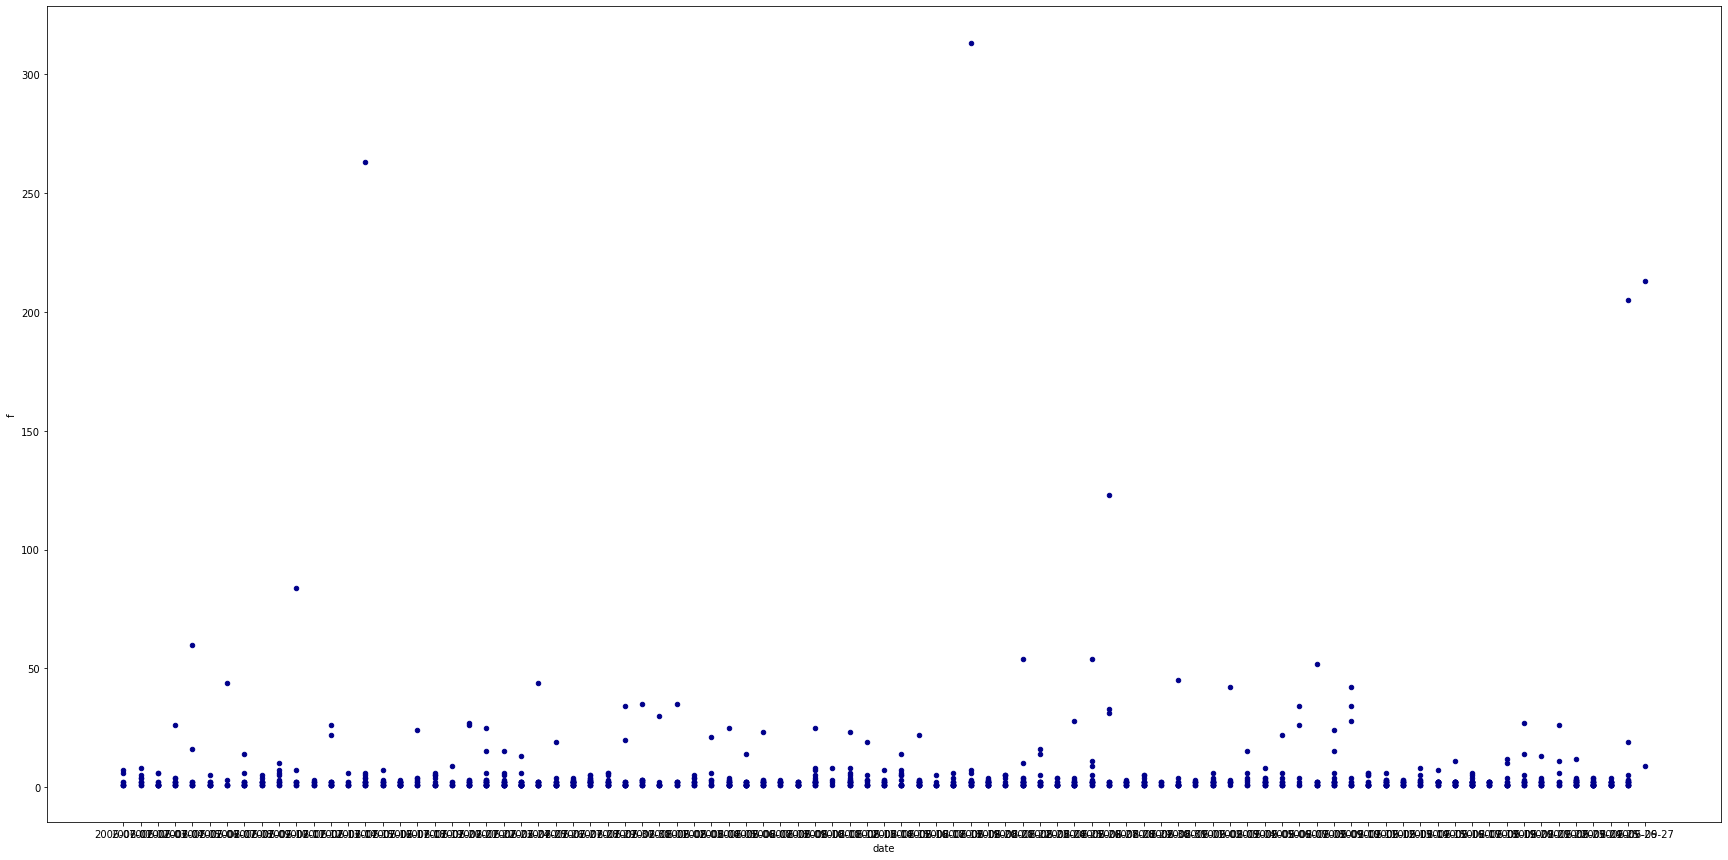

ipn:  4


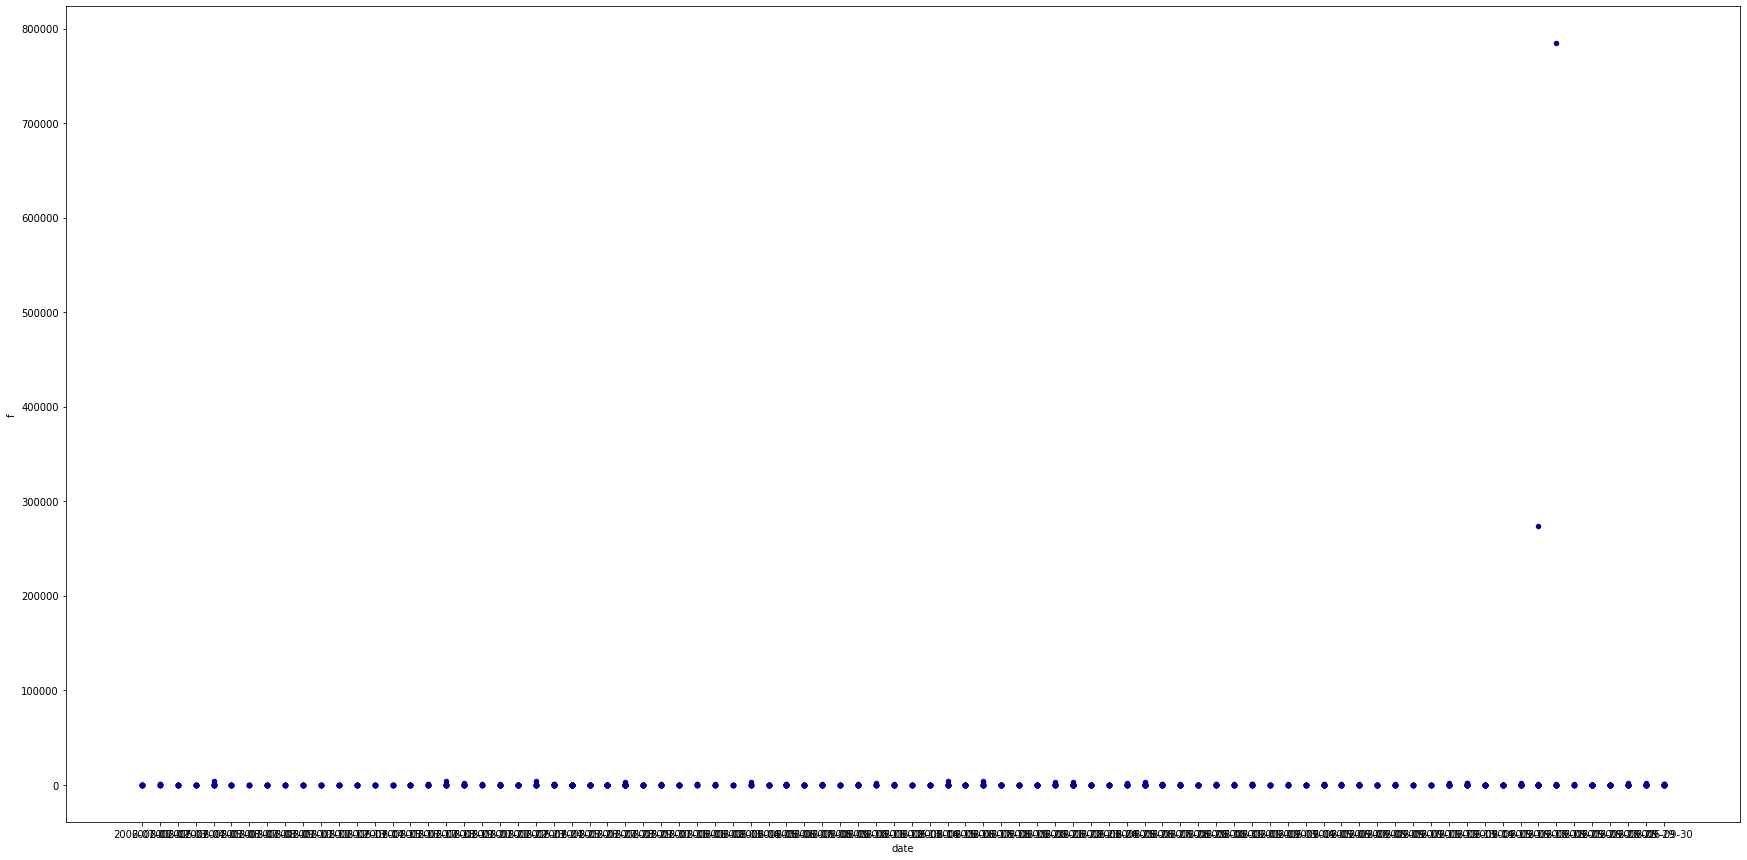

ipn:  5


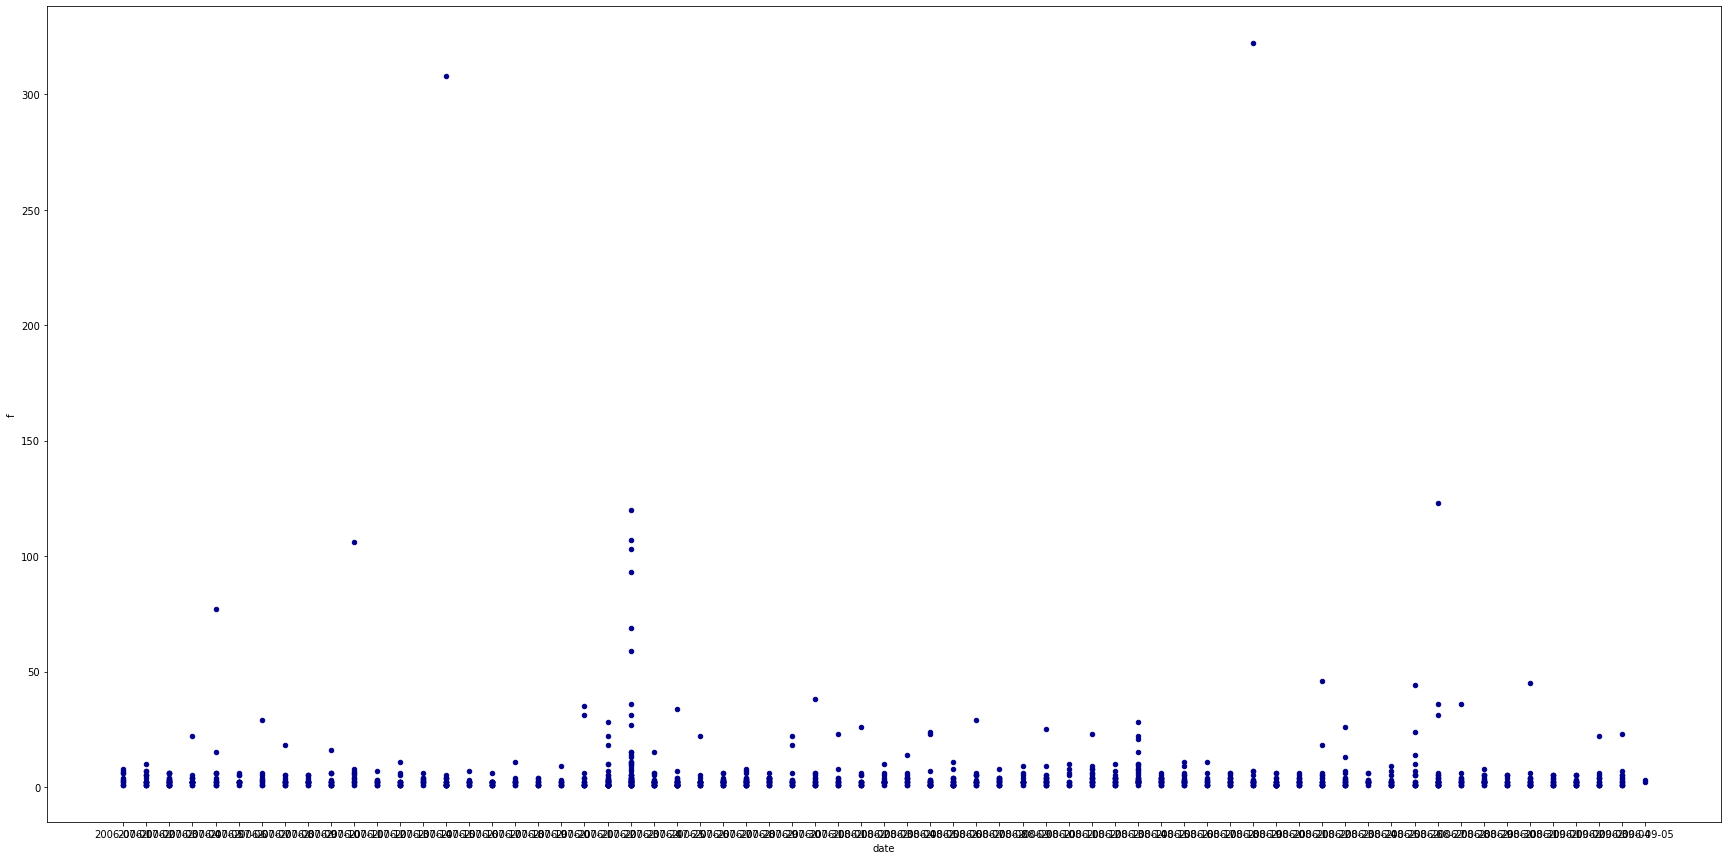

ipn:  6


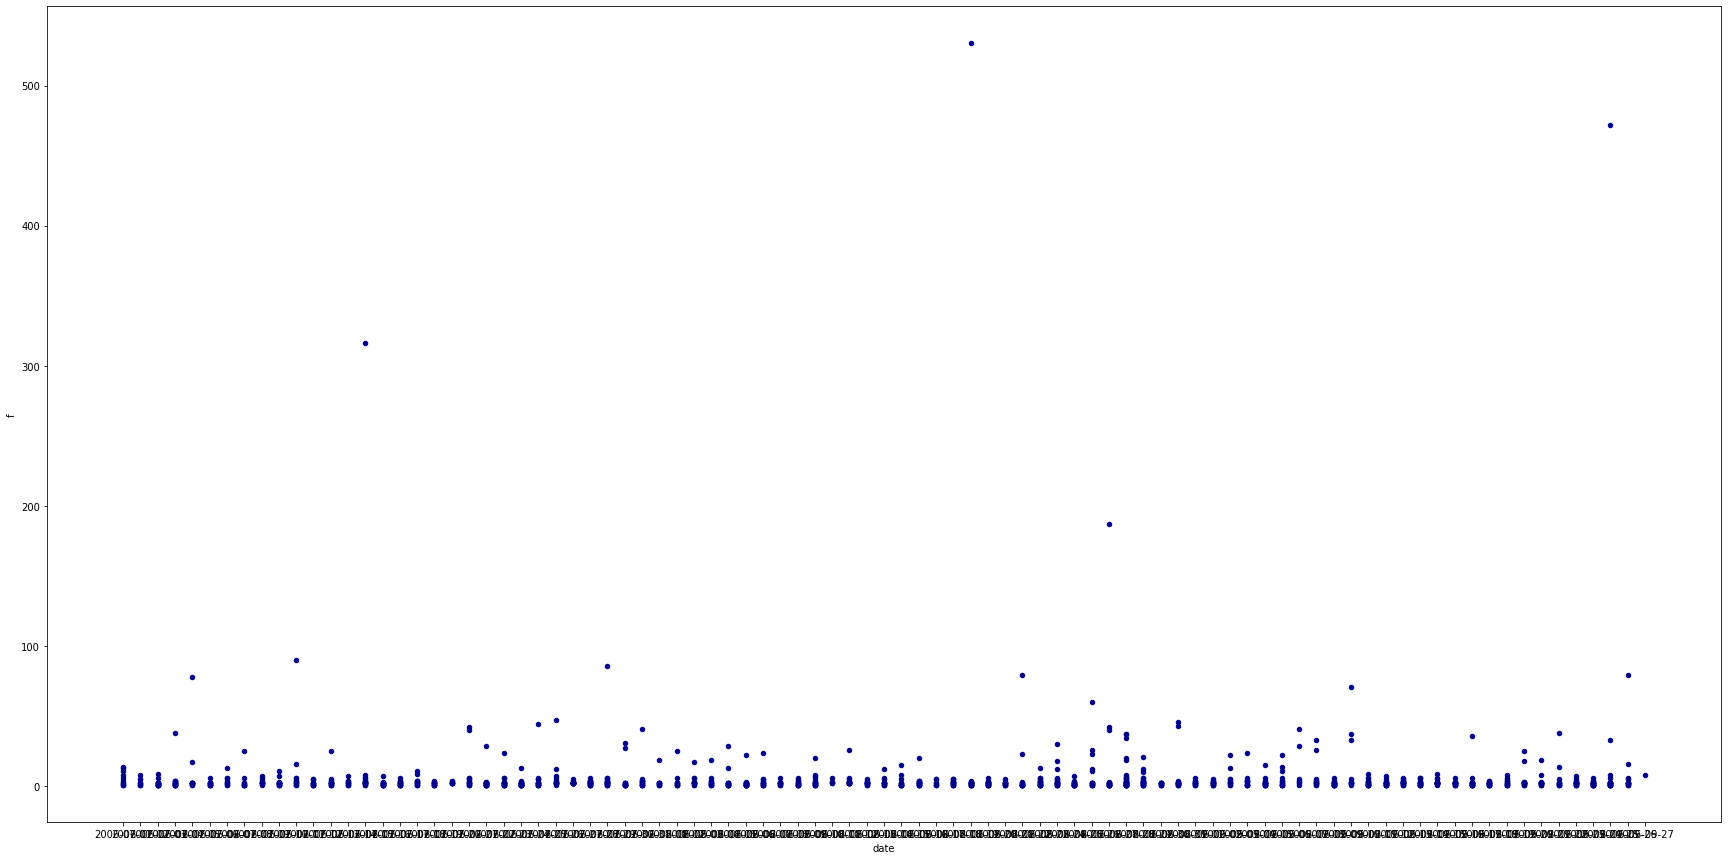

ipn:  7


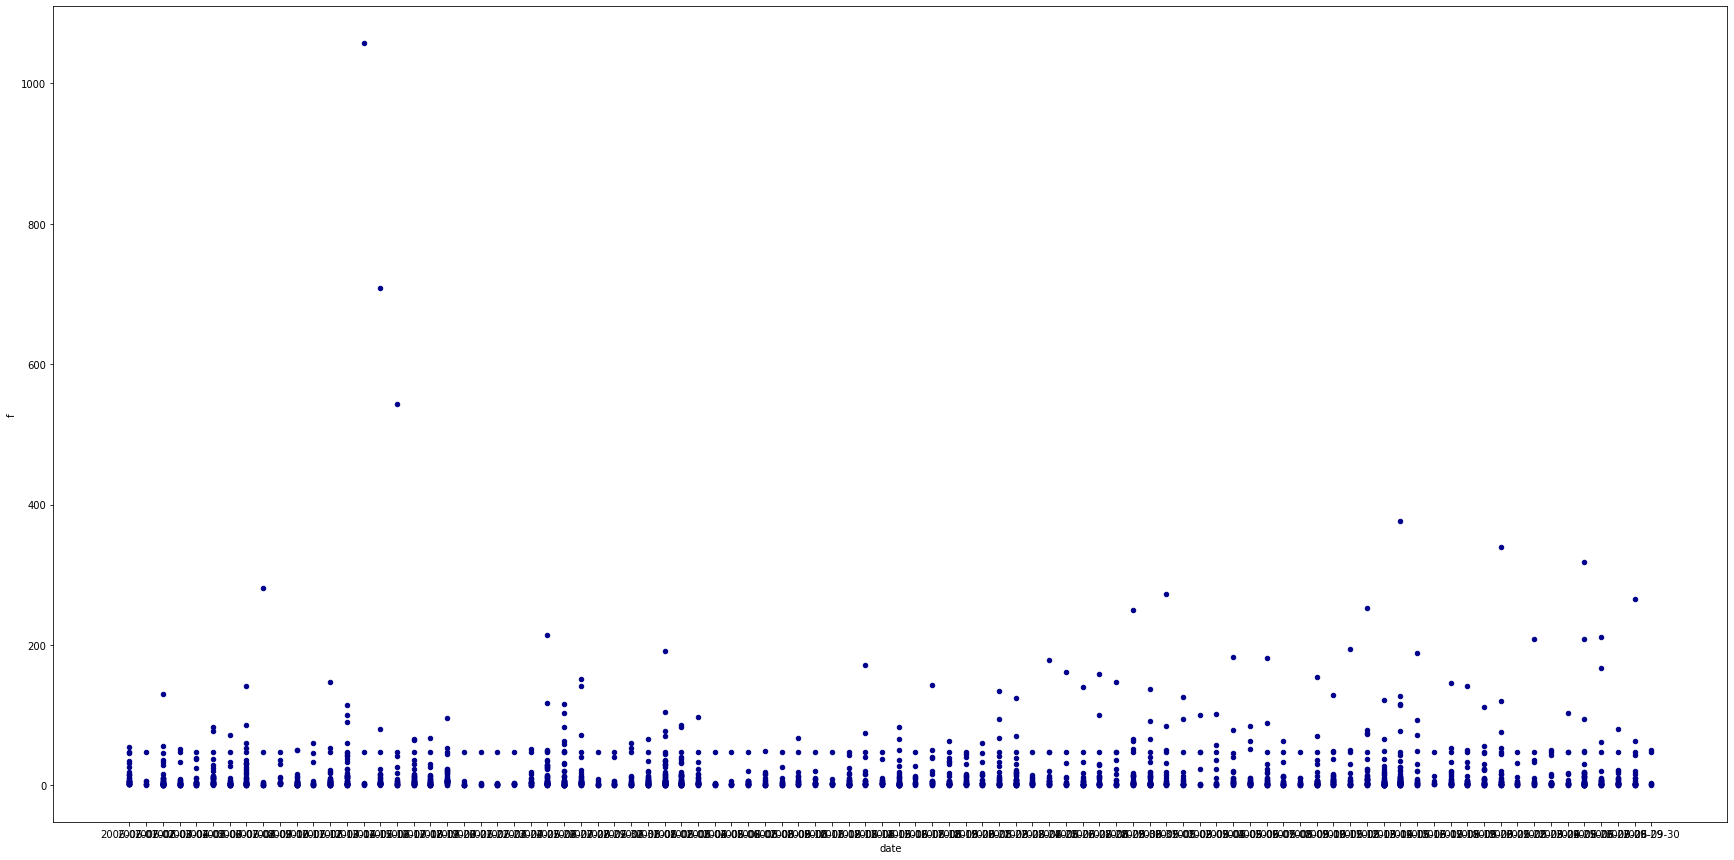

ipn:  8


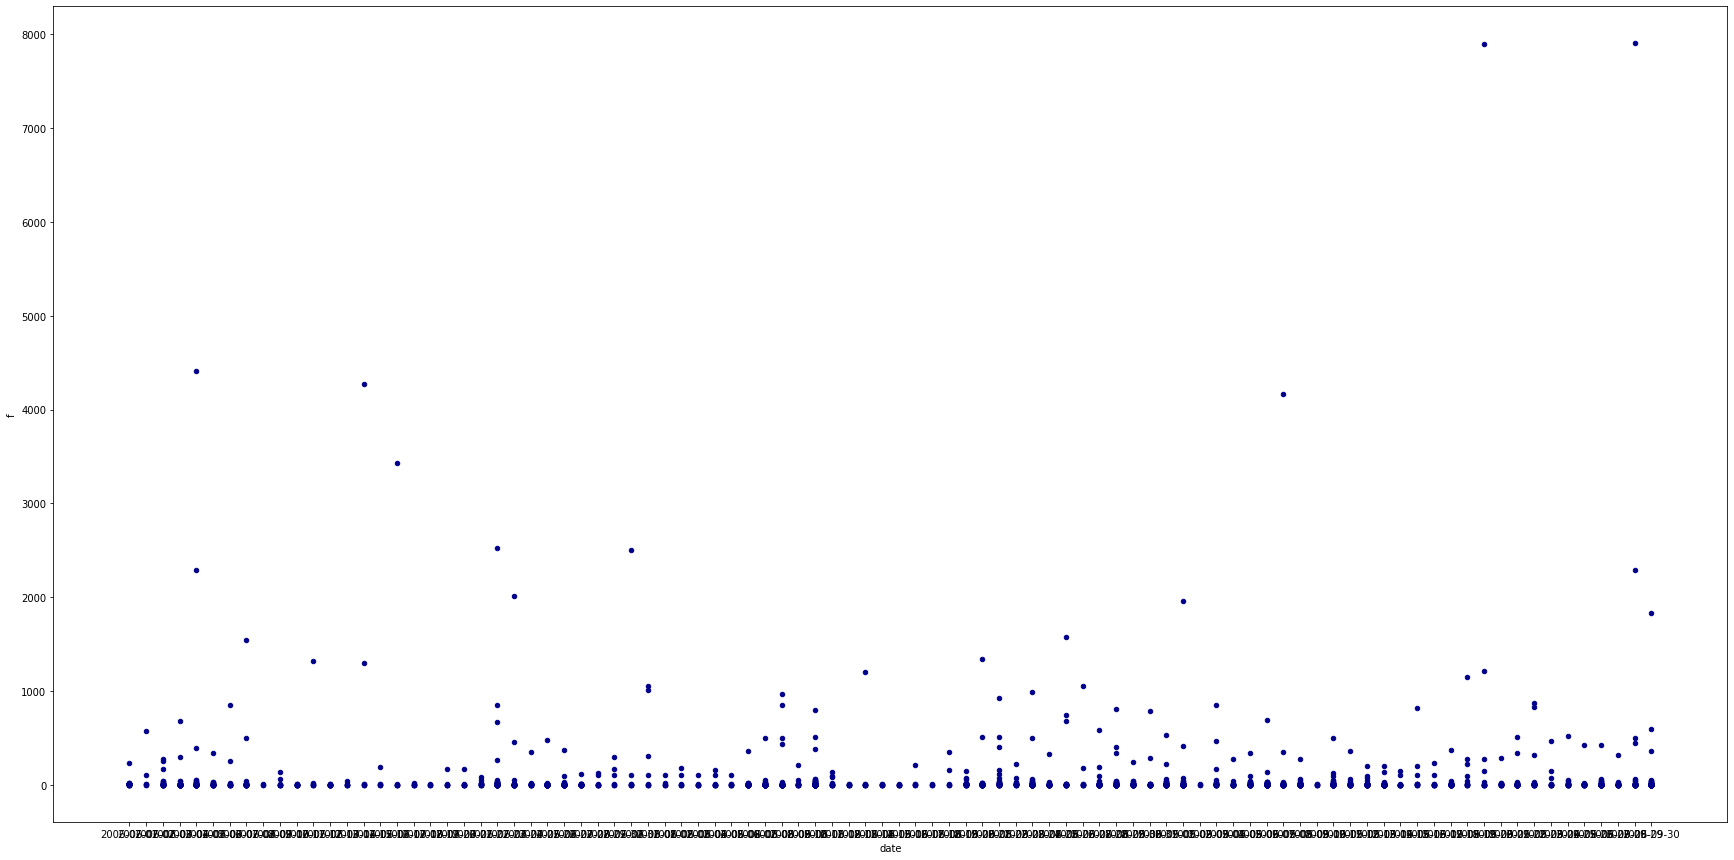

ipn:  9


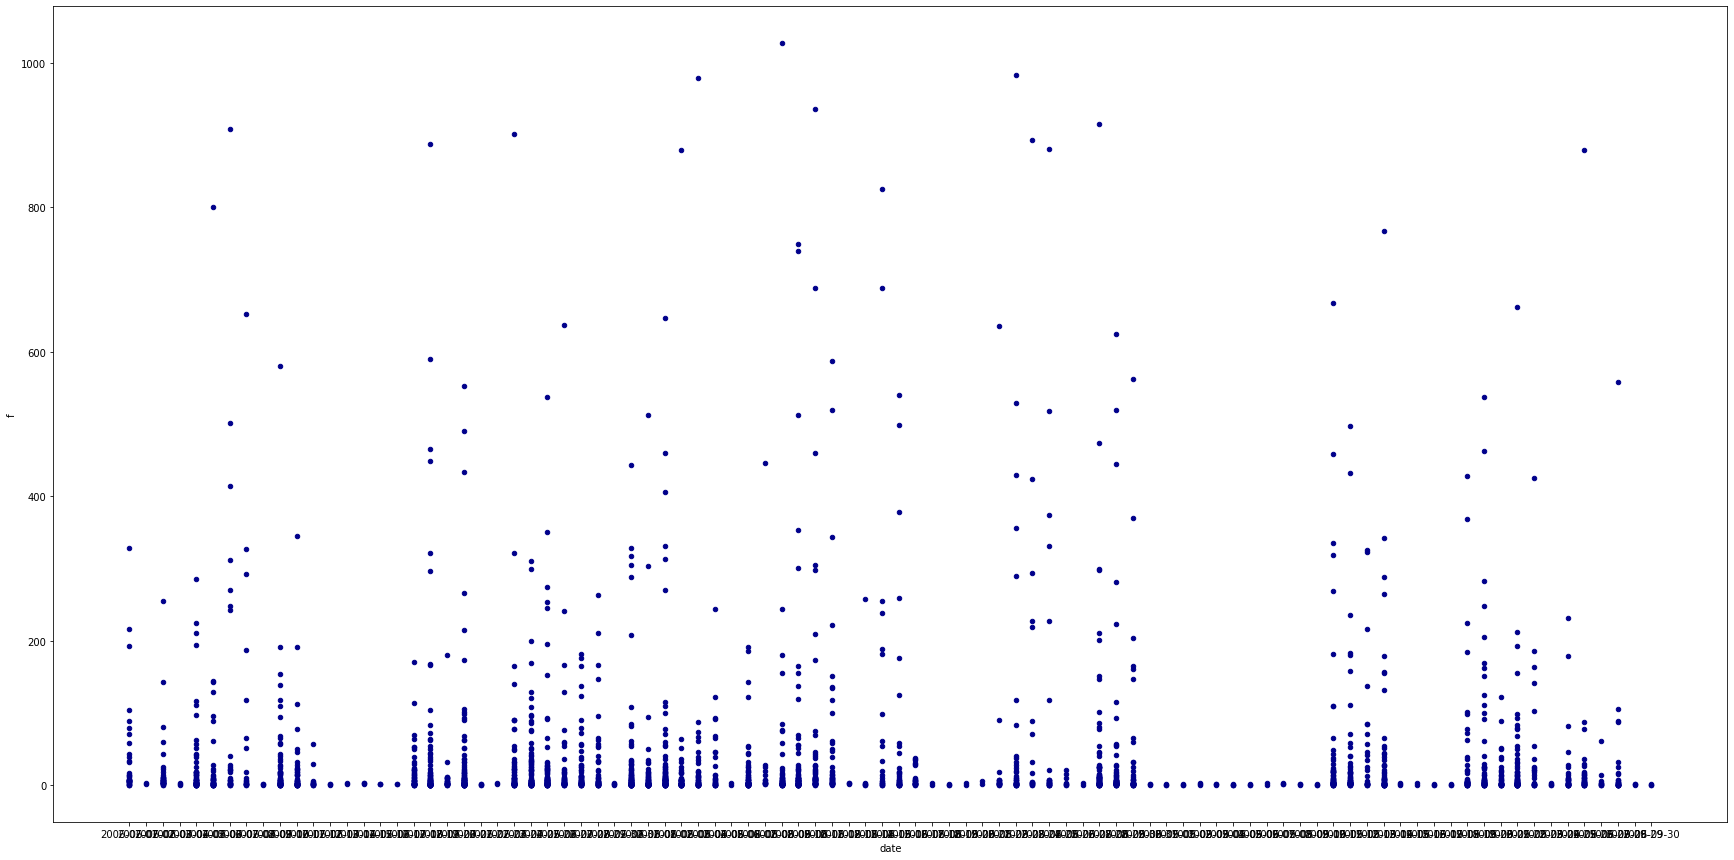

In [13]:

ipns = df["l_ipn"].unique()
for ipn in ipns:
    print("ipn: ", ipn)

    df_ipn = df[df['l_ipn'] == ipn]
    pl = df_ipn.plot.scatter(x='date',y='f',c='DarkBlue', figsize=(30,15))
    plt.show()
    
#     print(df_ipn)
    

In [32]:
## Cleaning data
def convertToInteger(s):
    return s.replace("-", "")

df['dateNumber'] = df['date'].apply(convertToInteger)
print(df.head())

         date  l_ipn  r_asn  f dateNumber
0  2006-07-01      0    701  1   20060701
1  2006-07-01      0    714  1   20060701
2  2006-07-01      0   1239  1   20060701
3  2006-07-01      0   1680  1   20060701
4  2006-07-01      0   2514  1   20060701


In [35]:
dfN = df[["dateNumber", "l_ipn", "r_asn", "f"]]
dfN

,dateNumber,l_ipn,r_asn,f
0,20060701,0,701,1
1,20060701,0,714,1
2,20060701,0,1239,1
3,20060701,0,1680,1
4,20060701,0,2514,1
...,...,...,...,...
20798,20060930,8,36351,3
20799,20060930,8,36856,4
20800,20060930,9,2152,1
20801,20060930,9,8070,1


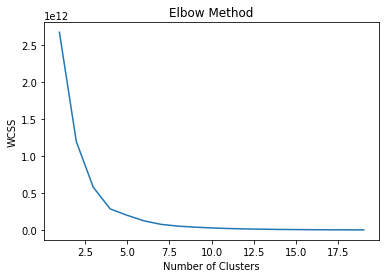

In [36]:

# First we want to find the numbers of cluster suitable for the given dataset
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(dfN)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,20),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
# Using elbow method, we understand that creating 3 or 4 clusters is suiatable
# using KMeans to cluster data
def kmCluster(dfN, n_clusters=4, n_init=10, max_iter=100, tol=0.001, random_state=0):
    kmClf = KMeans(n_clusters=n_clusters, n_init=n_init, max_iter=max_iter, tol=tol, random_state=random_state,)
    X = dfN.values
    return kmClf.fit(X)
   
kmClf = kmCluster(dfN,n_clusters=3) # choosing 3 clusters for data

In [39]:
kmClf.cluster_centers_

array([[2.00608050e+07, 4.20451677e+00, 6.93265892e+03, 6.07823979e+01],
       [2.00608110e+07, 4.29041239e+00, 2.57766882e+04, 4.42639638e+01],
       [2.00609180e+07, 4.00000000e+00, 3.67100000e+03, 7.84234000e+05]])

In [40]:

# adding kmClf.labels_ to data
kmDf = pd.DataFrame(df.values.tolist(), index=df.index)
kmDf['cluster'] = kmClf.labels_
kmDf

,0,1,2,3,4,cluster
0,2006-07-01,0,701,1,20060701,0
1,2006-07-01,0,714,1,20060701,0
2,2006-07-01,0,1239,1,20060701,0
3,2006-07-01,0,1680,1,20060701,0
4,2006-07-01,0,2514,1,20060701,0
...,...,...,...,...,...,...
20798,2006-09-30,8,36351,3,20060930,1
20799,2006-09-30,8,36856,4,20060930,1
20800,2006-09-30,9,2152,1,20060930,0
20801,2006-09-30,9,8070,1,20060930,0
